In [1]:
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines
from libra_toolbox.tritium.model import (
    quantity_to_activity,
    activity_to_quantity,
)
from plotting_mod import (
    ureg,
    plot_bars,
    plot_integrated_top_release,
    plot_integrated_wall_release,
    plot_irradiation,
    plot_sample_activity_top,
    plot_sample_activity_wall,
    plot_salt_inventory,
    plot_top_release,
    plot_wall_release,
)

ureg.mpl_formatter = "{:~P}"
# remove top and right axes by default
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
# set axis below true by default
plt.rcParams["axes.axisbelow"] = True

from tritium_model import *

/workspaces/BABY-1L-run-2-test/analysis/tritium/lsc_measurements_mod.py:169: UserWarning: Activity of 1L-IV_2-0-1 is negative after substracting background. Setting to zero.
  warnings.warn(
/workspaces/BABY-1L-run-2-test/analysis/tritium/lsc_measurements_mod.py:169: UserWarning: Activity of 1L-IV_2-0-4 is negative after substracting background. Setting to zero.
  warnings.warn(
/workspaces/BABY-1L-run-2-test/analysis/tritium/lsc_measurements_mod.py:169: UserWarning: Activity of 1L-IV_2-1-1 is negative after substracting background. Setting to zero.
  warnings.warn(
/workspaces/BABY-1L-run-2-test/analysis/tritium/lsc_measurements_mod.py:169: UserWarning: Activity of 1L-IV_2-1-2 is negative after substracting background. Setting to zero.
  warnings.warn(
/workspaces/BABY-1L-run-2-test/analysis/tritium/lsc_measurements_mod.py:169: UserWarning: Activity of 1L-IV_2-1-4 is negative after substracting background. Setting to zero.
  warnings.warn(
/workspaces/BABY-1L-run-2-test/analysis/triti

Processed data stored in ../../data/processed_data.json


===== BASED ON SINGLE COUNTS =====
Quantity of T consumed: 2.26×10¹³ particle
Uncertainty on T consumed: 2.01×10¹² particle
Quantity of T consumed: 4.03×10⁴ Bq
Quantity of T produced: 9.56×10¹ Bq
Quantity of T produced: 5.35×10¹⁰ particle
Measured TBR: 2.37e-03 particle / neutron
===== BASED ON REPEAT COUNTS =====
Quantity of T consumed: 2.26×10¹³ particle
Uncertainty on T consumed: 2.01×10¹² particle
Quantity of T consumed: 4.03×10⁴ Bq
Quantity of T produced: 8.99×10¹ Bq
Quantity of T produced: 5.03×10¹⁰ particle
Stdev of quantity of T produced: 7.59×10⁻¹ Bq
Measured TBR: 2.23e-03 particle / neutron
Stdev of measured TBR: 1.88e-05 particle / neutron
0.8613942740039692 dimensionless


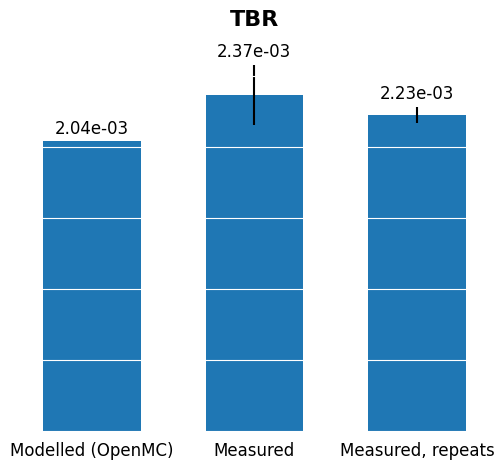

NOTE: Repeat count error bar is 3*sigma, only accounting for LSC error


In [2]:
print("===== BASED ON SINGLE COUNTS =====")
print(f"Quantity of T consumed: {T_consumed.to(ureg.particle):.2e~P}")
print(f"Uncertainty on T consumed: {(neutron_rate_relative_uncertainty * T_consumed).to(ureg.particle):.2e~P}")
print(f"Quantity of T consumed: {quantity_to_activity(T_consumed).to(ureg.Bq):.2e~P}")
print(f"Quantity of T produced: {T_produced:.2e~P}")
print(f"Quantity of T produced: {activity_to_quantity(T_produced).to(ureg.particle):.2e~P}")
print(f"Measured TBR: {measured_TBR:.2e}")
print("===== BASED ON REPEAT COUNTS =====")
print(f"Quantity of T consumed: {T_consumed.to(ureg.particle):.2e~P}")
print(f"Uncertainty on T consumed: {(neutron_rate_relative_uncertainty * T_consumed).to(ureg.particle):.2e~P}")
print(f"Quantity of T consumed: {quantity_to_activity(T_consumed).to(ureg.Bq):.2e~P}")
print(f"Quantity of T produced: {T_produced_repeat:.2e~P}")
print(f"Quantity of T produced: {activity_to_quantity(T_produced_repeat).to(ureg.particle):.2e~P}")
print(f"Stdev of quantity of T produced: {T_produced_repeat_stdev:.2e~P}")
print(f"Measured TBR: {measured_TBR_repeat:.2e}")
print(f"Stdev of measured TBR: {measured_TBR_repeat_stdev:.2e}")
plt.figure(figsize=(6, 5))
bars = plt.bar(
    [0, 2, 4],
    [calculated_TBR, measured_TBR, measured_TBR_repeat],
    tick_label=["Modelled (OpenMC)", "Measured", "Measured, repeats"],
    yerr=[0, neutron_rate_relative_uncertainty * measured_TBR, 3 * measured_TBR_repeat_stdev],
    width=1.2
)

plt.bar_label(bars, fontsize=12, fmt="%.2e", padding=3)
plt.title("TBR", weight="bold", fontsize=16, pad=15)
plt.ylabel("")
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels
plt.gca().tick_params(axis="both", which="both", left=False, bottom=False, labelsize=12)
plt.gca().set_axisbelow(False)
plt.grid(axis="y", alpha=1, color="white", zorder=-10)
# plt.tight_layout()
print((calculated_TBR/measured_TBR).to(ureg.dimensionless))
plt.show()
print("NOTE: Repeat count error bar is 3*sigma, only accounting for LSC error")

===== BASED ON SINGLE COUNTS =====
Quantity of T consumed: 2.26×10¹³ particle
Uncertainty on T consumed: 2.01×10¹² particle
Quantity of T consumed: 4.03×10⁴ Bq
Quantity of T produced: 9.56×10¹ Bq
Quantity of T produced: 5.35×10¹⁰ particle
Measured TBR: 2.37e-03 particle / neutron
0.8613942740039692 dimensionless


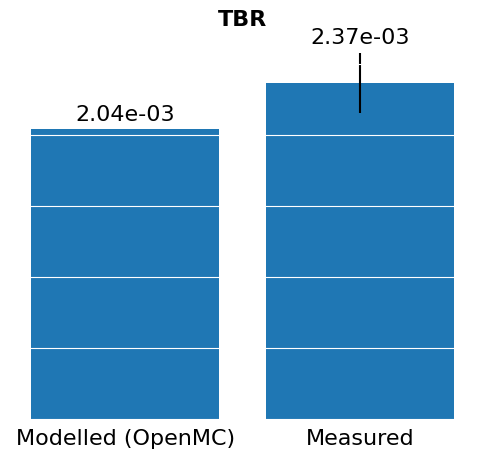

In [3]:
print("===== BASED ON SINGLE COUNTS =====")
print(f"Quantity of T consumed: {T_consumed.to(ureg.particle):.2e~P}")
print(f"Uncertainty on T consumed: {(neutron_rate_relative_uncertainty * T_consumed).to(ureg.particle):.2e~P}")
print(f"Quantity of T consumed: {quantity_to_activity(T_consumed).to(ureg.Bq):.2e~P}")
print(f"Quantity of T produced: {T_produced:.2e~P}")
print(f"Quantity of T produced: {activity_to_quantity(T_produced).to(ureg.particle):.2e~P}")
print(f"Measured TBR: {measured_TBR:.2e}")
plt.figure(figsize=(6, 5))
bars = plt.bar(
    [0, 1],
    [calculated_TBR, measured_TBR],
    tick_label=["Modelled (OpenMC)", "Measured"],
    yerr=[0, neutron_rate_relative_uncertainty * measured_TBR],
)

plt.bar_label(bars, fontsize=16, fmt="%.2e", padding=3)
plt.title("TBR", weight="bold", fontsize=16)
plt.ylabel("")
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels
plt.gca().tick_params(axis="both", which="both", left=False, bottom=False, labelsize=16)
plt.gca().set_axisbelow(False)
plt.grid(axis="y", alpha=1, color="white", zorder=-10)
# plt.tight_layout()
print((calculated_TBR/measured_TBR).to(ureg.dimensionless))
plt.show()

In [4]:
baby_model.run(80 * ureg.day)

/home/codespace/.local/lib/python3.12/site-packages/scipy/integrate/_ivp/base.py:23: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(fun(t, y), dtype=dtype)


In [5]:
print(f"Transport:")
print(f"  mass transport coeff top: {baby_model.k_top:.2e~P}")
print(f"  mass transport coeff wall: {baby_model.k_wall:.2e~P}")

print("Source:")
print(f"  TBR: {baby_model.TBR:.2e~P}")
print(f"  neutron rate: {baby_model.neutron_rate:.2e~P}")
print(f"  neutron rate * TBR: {baby_model.neutron_rate * baby_model.TBR:.2e~P}")
# print(f"  k_top/k_wall: {baby_model.k_top/baby_model.k_wall:.2f~P}")
print(f"  total irradiation time: {total_irradiation_time.to(ureg.h):.2f~P}")

print("Geometry:")
print(f"  volume: {baby_model.volume.to(ureg.cm**3):.2f~P}")
print(f"  top area: {baby_model.A_top.to(ureg.cm**2):.2f~P}")
print(f"  wall area: {baby_model.A_wall.to(ureg.cm**2):.2f~P}")

Transport:
  mass transport coeff top: 6.23×10⁻⁸ m/s
  mass transport coeff wall: 0.00×10⁰ m/s
Source:
  TBR: 2.37×10⁻³ particle/n
  neutron rate: 2.61×10⁸ n/s
  neutron rate * TBR: 6.19×10⁵ particle/s
  total irradiation time: 24.00 h
Geometry:
  volume: 1000.00 cm³
  top area: 153.94 cm²
  wall area: 445.87 cm²


In [6]:
baby_model_repeat.run(80 * ureg.day)

In [7]:
print(f"Transport:")
print(f"  mass transport coeff top: {baby_model_repeat.k_top:.2e~P}")
print(f"  mass transport coeff wall: {baby_model_repeat.k_wall:.2e~P}")

print("Source:")
print(f"  TBR: {baby_model_repeat.TBR:.2e~P}")
print(f"  neutron rate: {baby_model_repeat.neutron_rate:.2e~P}")
print(f"  neutron rate * TBR: {baby_model_repeat.neutron_rate * baby_model_repeat.TBR:.2e~P}")
# print(f"  k_top/k_wall: {baby_model_repeat.k_top/baby_model_repeat.k_wall:.2f~P}")
print(f"  total irradiation time: {total_irradiation_time.to(ureg.h):.2f~P}")

print("Geometry:")
print(f"  volume: {baby_model_repeat.volume.to(ureg.cm**3):.2f~P}")
print(f"  top area: {baby_model_repeat.A_top.to(ureg.cm**2):.2f~P}")
print(f"  wall area: {baby_model_repeat.A_wall.to(ureg.cm**2):.2f~P}")

Transport:
  mass transport coeff top: 6.23×10⁻⁸ m/s
  mass transport coeff wall: 0.00×10⁰ m/s
Source:
  TBR: 2.23×10⁻³ particle/n
  neutron rate: 2.61×10⁸ n/s
  neutron rate * TBR: 5.82×10⁵ particle/s
  total irradiation time: 24.00 h
Geometry:
  volume: 1000.00 cm³
  top area: 153.94 cm²
  wall area: 445.87 cm²


## Cumulative release

Text(0.0, 1.0, 'Cumulative tritium release')

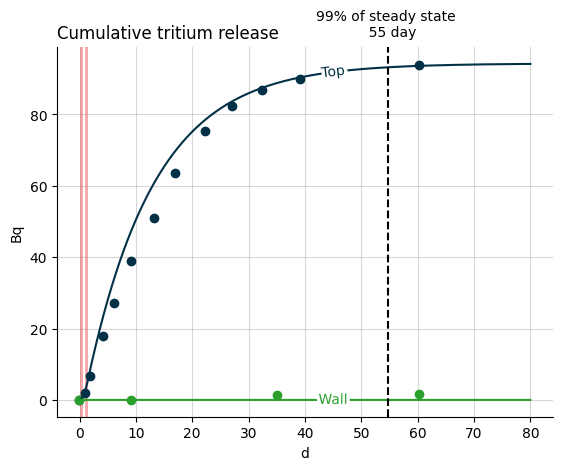

In [8]:
plt.figure()
(l,) = plot_integrated_top_release(baby_model, color="#023047", label="Top")
plot_integrated_wall_release(baby_model, color="tab:green", label="Wall")
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[45]*2)
# plt.ylim(bottom=0 * ureg.Bq)

plt.scatter(
    replacement_times_top, IV_stream.get_cumulative_activity("total"), color="#023047"
)
plt.scatter(
    replacement_times_walls,
    OV_stream.get_cumulative_activity("total"),
    color="tab:green",
)

# add line where top is 99% of final
ydata = l.get_ydata()
xdata = l.get_xdata()
target_release_frac = 0.99
x_target = xdata[np.argmax(ydata > target_release_frac * ydata[-1])]

plt.axvline(x=x_target, color="k", linestyle="--")
plt.annotate(
    f"99% of steady state \n {x_target: .0f}",
    (x_target, target_release_frac * ydata[-1]),
    xytext=(0, 20),
    textcoords="offset points",
    ha="center",
    va="bottom",
    color="k",
)

plt.title("Cumulative tritium release", loc="left")

/opt/conda/envs/baby_1l_run_2/lib/python3.12/site-packages/labellines/core.py:216: UserWarning: The value at position 0 in `xvals` is outside the range of its associated line (xmin=0.0, xmax=79.99999999999999, xval=90). Clipping it into the allowed range.
  warnings.warn(
/opt/conda/envs/baby_1l_run_2/lib/python3.12/site-packages/labellines/core.py:216: UserWarning: The value at position 1 in `xvals` is outside the range of its associated line (xmin=0.0, xmax=79.99999999999999, xval=90). Clipping it into the allowed range.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/matplotlib/axes/_axes.py:3625: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(err, dtype=object)


Text(0.0, 1.0, 'Cumulative tritium release, repeat at 3sigma')

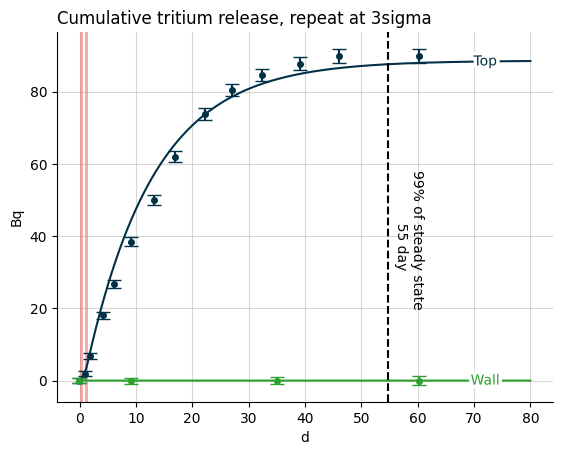

In [9]:
plt.figure()
(l,) = plot_integrated_top_release(baby_model_repeat, color="#023047", label="Top")
plot_integrated_wall_release(baby_model_repeat, color="tab:green", label="Wall")
plot_irradiation(baby_model_repeat, facecolor="#EF5B5B", alpha=0.5)
plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[90]*2)

# Extract point values and standard deviations
top_activity, top_stdev = IV_stream_repeat.get_cumulative_activity("total")
wall_activity, wall_stdev = OV_stream_repeat.get_cumulative_activity("total")

# Convert errors to 3 sigma
top_errors = 3 * top_stdev
wall_errors = 3 * wall_stdev

# Convert y values to magnitudes
top_activity_mag = top_activity.magnitude
wall_activity_mag = wall_activity.magnitude

# Scatter plots with error bars
plt.errorbar(
    replacement_times_top, top_activity_mag, yerr=top_errors,
    fmt="o", ms=4, color="#023047", capsize=5, label="Top"
)
plt.errorbar(
    replacement_times_walls, wall_activity_mag, yerr=wall_errors,
    fmt="o", ms=4, color="tab:green", capsize=5, label="Wall"
)

# add line where top is 99% of final
ydata = l.get_ydata()
xdata = l.get_xdata()
target_release_frac = 0.99
x_target = xdata[np.argmax(ydata > target_release_frac * ydata[-1])]

plt.axvline(x=x_target, color="k", linestyle="--")
plt.annotate(
    f"99% of steady state \n {x_target: .0f}",
    (x_target, target_release_frac * ydata[-1]),
    xytext=(15, -180),
    textcoords="offset points",
    ha="center",
    va="bottom",
    color="k",
    rotation=270
)

plt.title("Cumulative tritium release, repeat at 3sigma", loc="left")

## Irradiation profile

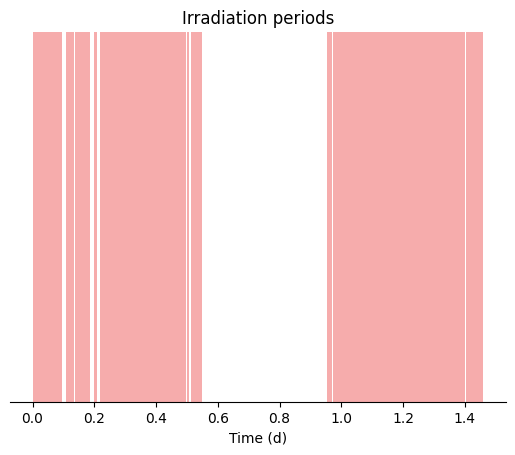

In [10]:
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.xlabel(f"Time ({plt.gca().xaxis.get_units():~P})")
# remove y axis
plt.title("Irradiation periods")
plt.gca().spines["left"].set_visible(False)
plt.gca().set_yticks([])
plt.gca().set_ylabel("")
plt.show()

(0.0, 1.4)

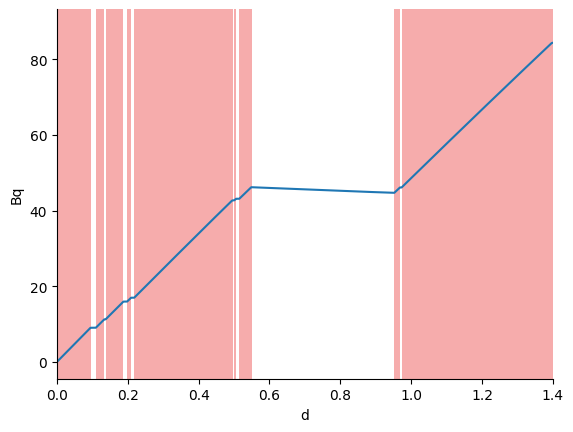

In [11]:
from plotting_mod import plot_salt_inventory

plot_salt_inventory(model=baby_model)
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.xlim(0, 1.4)

## Sample activity

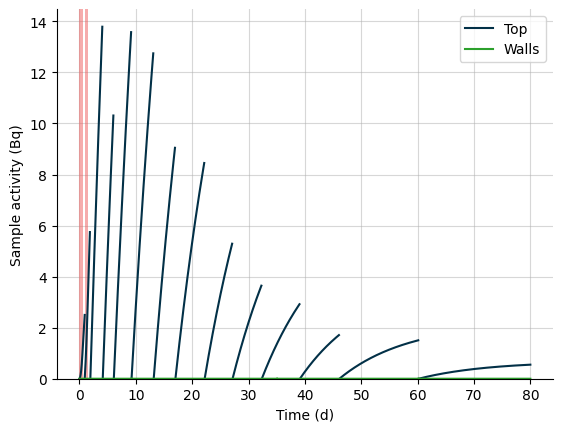

In [12]:
plot_sample_activity_top(baby_model, replacement_times=replacement_times_top, color="#023047", label="Top")
plot_sample_activity_wall(baby_model, replacement_times=replacement_times_walls, color="tab:green", label="Walls")
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.grid(alpha=0.5)
plt.ylim(bottom=0 * ureg.Bq)
plt.ylabel(f"Sample activity ({plt.gca().yaxis.get_units():~P})")
plt.xlabel(f"Time ({plt.gca().xaxis.get_units():~P})")
plt.legend()

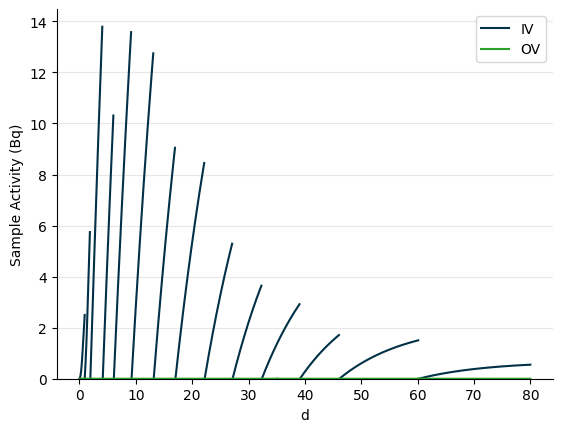

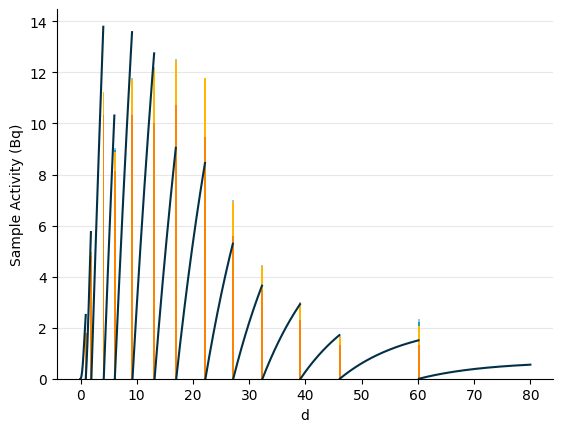

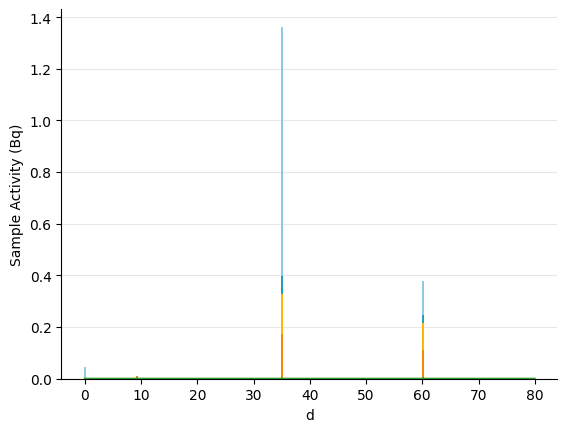

In [13]:
plt.figure()
plot_sample_activity_top(baby_model, replacement_times=replacement_times_top, color="#023047", label="IV")
plot_sample_activity_wall(baby_model, replacement_times=replacement_times_walls, color="tab:green", label="OV")
plt.grid(True, axis="y", alpha=0.3)
plt.ylim(bottom=0 * ureg.Bq)
plt.ylabel("Sample Activity (Bq)")
plt.legend()

plt.figure()
plot_bars(IV_stream, index=[time.to(ureg.day) for time in replacement_times_top])
plot_sample_activity_top(baby_model, replacement_times=replacement_times_top, color="#023047", label="Model")

plt.grid(True, axis="y", alpha=0.3)
plt.ylim(bottom=0 * ureg.Bq)
plt.ylabel("Sample Activity (Bq)")

plt.figure()
plot_bars(OV_stream, index=[time.to(ureg.day) for time in replacement_times_walls])
plot_sample_activity_wall(baby_model, replacement_times=replacement_times_walls, color="tab:green", label="Model")

plt.grid(True, axis="y", alpha=0.3)
# plt.ylim(bottom=0 * ureg.Bq)
# plt.xlim(0, 3)
plt.ylabel("Sample Activity (Bq)")

plt.show()

### Predicting sample activity

This is only useful for predicting sample activity while the run is not over.

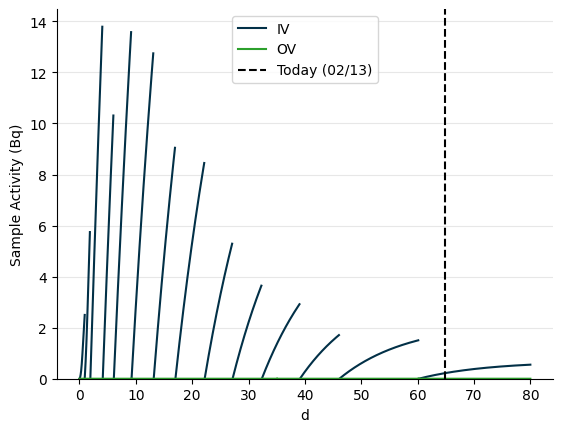

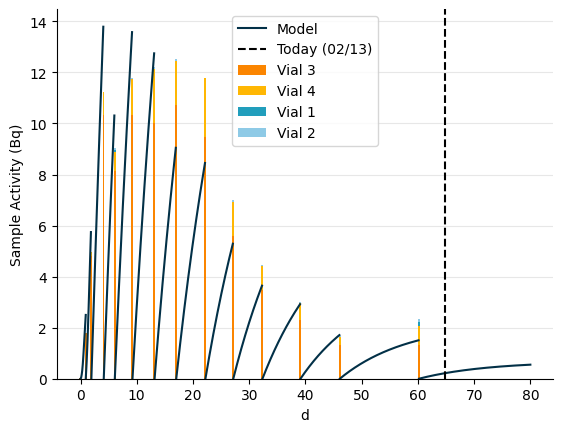

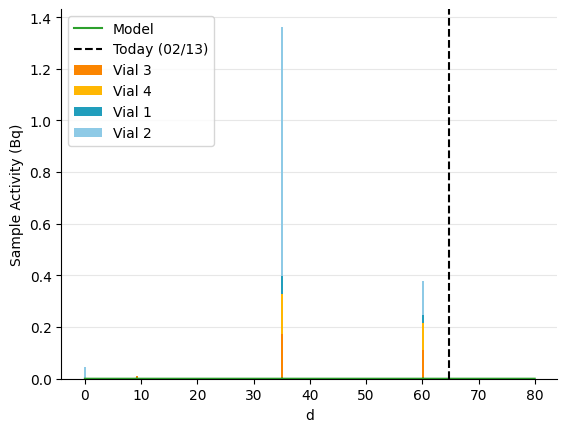

In [14]:
planned_replacement_times_top = []
planned_replacement_times_walls = []


    
# read general data
import json
from datetime import datetime

def plot_today():
    todays_date = datetime.today()
    today = (todays_date - start_time).total_seconds() * ureg.s
    today = today.to(ureg.day)
    plt.axvline(today, color="k", linestyle="--", label=f"Today ({todays_date:%m/%d})")


with open("../../data/general.json", "r") as f:
    general_data = json.load(f)

for sample, data in general_data["tritium_detection"]["IV"].items():
    if data["actual_sample_time"] is not None:
        time = data["actual_sample_time"]
    else:
        time = data["planned_sample_time"]

    time = datetime.strptime(time, "%m/%d/%Y %H:%M")
    relative_time = time - start_time
    planned_replacement_times_top.append(relative_time.total_seconds() * ureg.s)

for sample, data in general_data["tritium_detection"]["OV"].items():
    if data["actual_sample_time"] is not None:
        time = data["actual_sample_time"]
    else:
        time = data["planned_sample_time"]

    time = datetime.strptime(time, "%m/%d/%Y %H:%M")
    relative_time = time - start_time
    planned_replacement_times_walls.append(relative_time.total_seconds() * ureg.s)

planned_replacement_times_top = ureg.Quantity.from_list(planned_replacement_times_top)
planned_replacement_times_walls = ureg.Quantity.from_list(planned_replacement_times_walls)


plt.figure()
plot_sample_activity_top(
    baby_model,
    replacement_times=planned_replacement_times_top,
    color="#023047",
    label="IV",
)
plot_sample_activity_wall(
    baby_model,
    replacement_times=planned_replacement_times_walls,
    color="tab:green",
    label="OV",
)
plot_today()
plt.grid(True, axis="y", alpha=0.3)
plt.ylim(bottom=0 * ureg.Bq)
plt.ylabel("Sample Activity (Bq)")
plt.legend()

plt.figure()
plot_bars(IV_stream, index=[time.to(ureg.day) for time in replacement_times_top])
plot_sample_activity_top(
    baby_model,
    replacement_times=planned_replacement_times_top,
    color="#023047",
    label="Model",
)
plot_today()

plt.grid(True, axis="y", alpha=0.3)
plt.ylim(bottom=0 * ureg.Bq)
plt.ylabel("Sample Activity (Bq)")
plt.legend()

plt.figure()
plot_bars(OV_stream, index=[time.to(ureg.day) for time in replacement_times_walls])
plot_sample_activity_wall(
    baby_model,
    replacement_times=planned_replacement_times_walls,
    color="tab:green",
    label="Model",
)
plot_today()

plt.grid(True, axis="y", alpha=0.3)
plt.ylim(bottom=0 * ureg.Bq)
plt.ylabel("Sample Activity (Bq)")
plt.legend()

plt.show()